### Basic Data Viz

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_pickle("../outputs/all_features2.pkl")

In [4]:
# networks = pd.read_pickle("../outputs/all_networks.pkl")

In [15]:
df.forman_curvature = df.forman_curvature.apply(list)
df["forman_mean"] = df.forman_curvature.apply(np.mean)
df["forman_mean_log"] = df.forman_mean.apply(np.log)
df["ollivier_mean"] = df["OR_0"].apply(np.mean)
df = df.query("total_mortality != -88888 and non_hmo_mortality != -88888 ").copy()

In [16]:
df.columns.values

array(['hsanum', 'region', 'state', 'medicare_enrollment',
       'total_mortality', 'non_hmo_mortality', 'forman_curvature',
       'n_nodes', 'n_edges', 'density', 'assortativity',
       'average_degrees', 'clustering_coefficients',
       'node_connectivities', 'degree_correlations',
       'obd_overall_diab_bloodlip', 'obd_nonblk_diab_bloodlip',
       'obd_blk_diab_bloodlip', 'obd_blk_diab_eye',
       'obd_overall_diab_eye', 'obd_nonblk_diab_eye',
       'obd_overall_diab_hgb', 'obd_blk_diab_hgb', 'obd_nonblk_diab_hgb',
       'obd_overall_mam_mam6769', 'obd_nonblk_mam_mam6769',
       'obd_blk_mam_mam6769', 'obd_nonblk_ptbjune_amcare2',
       'obd_blk_ptbjune_amcare2', 'obd_overall_ptbjune_amcare2',
       'oe_overall_diab_bloodlip', 'oe_nonblk_diab_bloodlip',
       'oe_blk_diab_bloodlip', 'oe_blk_diab_eye', 'oe_overall_diab_eye',
       'oe_nonblk_diab_eye', 'oe_overall_diab_hgb', 'oe_blk_diab_hgb',
       'oe_nonblk_diab_hgb', 'oe_overall_mam_mam6769',
       'oe_nonblk_mam

In [7]:
df.columns.values[:10]

array(['hsanum', 'region', 'state', 'medicare_enrollment',
       'total_mortality', 'non_hmo_mortality', 'forman_curvature',
       'n_nodes', 'n_edges', 'density'], dtype=object)

In [8]:
vars_ = [
 #'medicare_enrollment',
 'total_mortality',
 'non_hmo_mortality',
 'race_total_pop',
 #'race_black_pop',
 #'hispanic_total_pop',
 #'hispanic_pop',
 #'median_hh_income',
 #'employment_pop',
 #'employment_unemployed_pop',
 #'education_pop',
 #'education_nohs_pop'
]

In [9]:
import matplotlib as mpl

In [10]:
cmap = mpl.colormaps["tab10"]

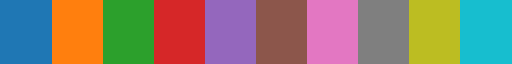

In [11]:
cmap

In [12]:
sorted_regions = sorted(df.region.unique(), key=lambda string: int(string.split()[1]))

In [13]:
def prettify(reg):
    return reg.replace(" ", "")

#### Note
In the following, all but the mortalities are scaled logarithmically, which makes it harder to interpret the plots (especially when axes are mixed). 
Beware that we are not looking at linear correlations here (except when examining mortalities on x and y).

In [14]:
labelsize = 18
ticksize = 16

### Top left (curvature result)
This replaces the planned ORC figure; we see that higher race population is associated with more negative curvature and larger medicare enrollment.
- x: race_total_pop
- y: forman_mean
- hue: region
- size: medicare_enrollment

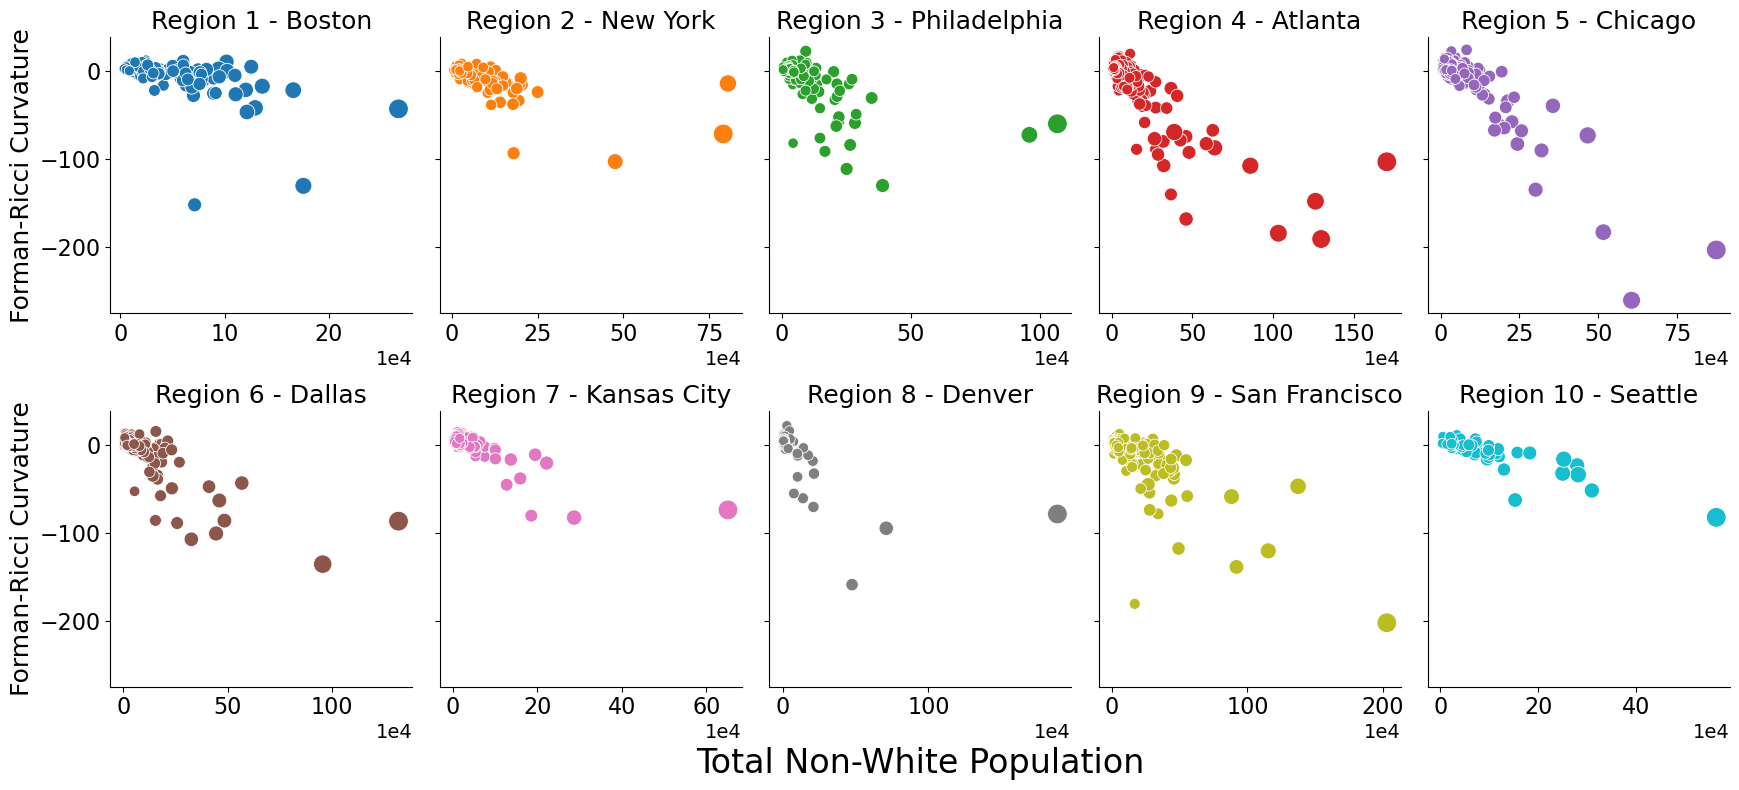

In [15]:
y_var = "forman_mean"
x_var = "race_total_pop"
fig, ax = plt.subplots(2,5,figsize=(1.75 * len(sorted_regions),4 * 2), sharey=True, sharex=False)

for idx,reg in enumerate(sorted_regions):
    x, y = divmod(idx,5)
    sns.scatterplot(df.query("region == @reg"), ax=ax[x,y], x=x_var, y=y_var, 
                    hue="region", palette=[cmap(idx/len(sorted_regions))], 
                    size="medicare_enrollment",sizes=(50,200),
                   legend=False)
    ax[x,y].set_title(reg, fontsize=labelsize)
    ax[x,y].set_xlabel("")
    ax[x,y].tick_params(axis='both', which='major', labelsize=ticksize)
    ax[x,y].ticklabel_format(style="sci", axis="x", scilimits=(4,4))
    ax[x,y].xaxis.offsetText.set_fontsize(ticksize - 2)
for idx in [0,1]:
    ax[idx,0].set_ylabel("Forman-Ricci Curvature", fontsize=labelsize)
ax[1,2].set_xlabel("Total Non-White Population", fontsize=labelsize + 6)
ax[1,2].xaxis.labelpad = 20
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/all-regions_{x_var}-vs-{y_var}.pdf", bbox_inches="tight", transparent=True)

In [16]:
y_var = "forman_mean"
for idx,reg in enumerate(sorted_regions):
    g = sns.pairplot(data=df.query("region == @reg"), y_vars=[y_var], x_vars=vars_, hue="region", palette=[cmap(idx/len(sorted_regions))])
    # for i in [0,3,4,5,6,7,8,9,10,11]:
    #     g.axes[0,i].set_xscale("log")
    plt.savefig(f"../figures/{prettify(reg)}_{y_var}_vs_mortality-statistics.pdf", bbox_inches="tight", transparent=True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
for idx,reg in enumerate(sorted_regions):
    g = sns.pairplot(data=df.query("region == @reg"), y_vars=vars_, x_vars=vars_, hue="region", palette=[cmap(idx/len(sorted_regions))])
    for i in [0,3,4,5,6,7,8,9,10,11]:
        for j in range(11):
            g.axes[j,i].set_xscale("log")
            g.axes[i,j].set_yscale("log")
    plt.savefig(f"../figures/{prettify(reg)}_mortality-statistics.pdf", bbox_inches="tight", transparent=True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Grouping variables

In [20]:
group_prefixes = ["oear", "obd", "cr", "ar", "ptl", "oecr", "oe", "expa", "exp"]
columns_dict = {p:list() for p in group_prefixes}
other_columns = list()
for x in df.columns.values:
    prefix, rest = x.split('_', 1) if "_" in x else (x, "")
    if prefix in group_prefixes:
        columns_dict[prefix].append(x)
    else:
        other_columns.append(x)

In [21]:
other_columns

['hsanum',
 'region',
 'state',
 'medicare_enrollment',
 'total_mortality',
 'non_hmo_mortality',
 'forman_curvature',
 'n_nodes',
 'n_edges',
 'density',
 'assortativity',
 'average_degrees',
 'clustering_coefficients',
 'node_connectivities',
 'degree_correlations',
 'race_total_pop',
 'race_black_pop',
 'hispanic_total_pop',
 'hispanic_pop',
 'median_hh_income',
 'employment_pop',
 'employment_unemployed_pop',
 'education_pop',
 'education_nohs_pop',
 'OR_0',
 'forman_mean',
 'forman_mean_log',
 'ollivier_mean']

In [22]:
columns_dict

{'oear': ['oear_pt_asr_ami_anyac',
  'oear_pt_asr_ami_aoervis',
  'oear_pt_asr_ami_mdac',
  'oear_pt_asr_ami_readmit',
  'oear_pt_asr_chf_anyac',
  'oear_pt_asr_chf_aoervis',
  'oear_pt_asr_chf_mdac',
  'oear_pt_asr_chf_readmit',
  'oear_pt_asr_med_anyac',
  'oear_pt_asr_med_aoervis',
  'oear_pt_asr_med_mdac',
  'oear_pt_asr_med_readmit',
  'oear_pt_asr_pn_anyac',
  'oear_pt_asr_pn_aoervis',
  'oear_pt_asr_pn_mdac',
  'oear_pt_asr_pn_readmit',
  'oear_pt_asr_sur_aoervis',
  'oear_pt_asr_sur_mdac',
  'oear_pt_asr_sur_readmit'],
 'obd': ['obd_overall_diab_bloodlip',
  'obd_nonblk_diab_bloodlip',
  'obd_blk_diab_bloodlip',
  'obd_blk_diab_eye',
  'obd_overall_diab_eye',
  'obd_nonblk_diab_eye',
  'obd_overall_diab_hgb',
  'obd_blk_diab_hgb',
  'obd_nonblk_diab_hgb',
  'obd_overall_mam_mam6769',
  'obd_nonblk_mam_mam6769',
  'obd_blk_mam_mam6769',
  'obd_nonblk_ptbjune_amcare2',
  'obd_blk_ptbjune_amcare2',
  'obd_overall_ptbjune_amcare2',
  'obd_pt_asr_ami_anyac',
  'obd_pt_asr_ami_aoervi

## Plotting CHOC Network

In [42]:
len(G.nodes())

119

In [41]:
# CHOC Network properties
choc_hsa = 5218
choc_network = "../outputs/santa_ana_graph.pkl"

with open(choc_network, "rb") as f:
    G = pickle.load(f)

#choc_curvature = df.query("hsanum == @choc_hsa").OR_0.values[0]

In [24]:
pos = nx.circular_layout(G)


degrees = G.degree() #Dict with Node ID, Degree
centrality = nx.degree_centrality(G)
cent_sizes = [centrality[node] * 500 for node in G.nodes()] #Scale Visually



nodes = G.nodes()
n_color = np.asarray([degrees[n] for n in nodes])


# Max
weights = [max(G[u][v]['a2b'],G[u][v]['b2a'])/20 for u,v in G.edges()]

In [25]:
df.query("hsanum == @choc_hsa").OR_0.iloc[0].min(), df.query("hsanum == @choc_hsa").OR_0.iloc[0].max()

(-1.295918367346939, 0.7536764705882355)

### Network Drawings of Santa Ana
Comments CC: 
- I like the Kamada-Kawai Layout (layout 2) best because it seems to show interesting referral motifs
- I put ORC on the edges here but am honestly unsure if the ordering I get from the DF matches the edge ordering (did you check?)
- I use a diverging color palette and centered it on 0
- I decided to go with the full Santa Ana network b/c there is only 3 CCs and the smaller 2 CCs only feature 2 nodes each

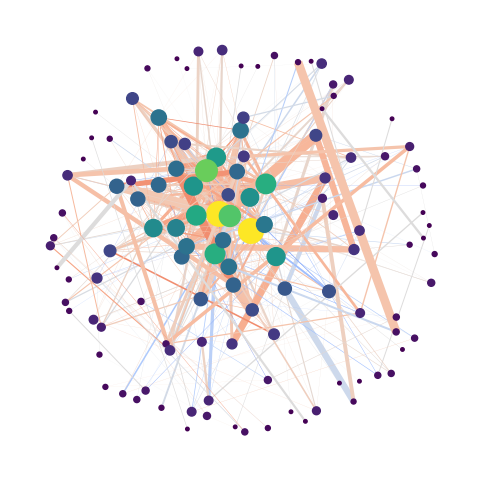

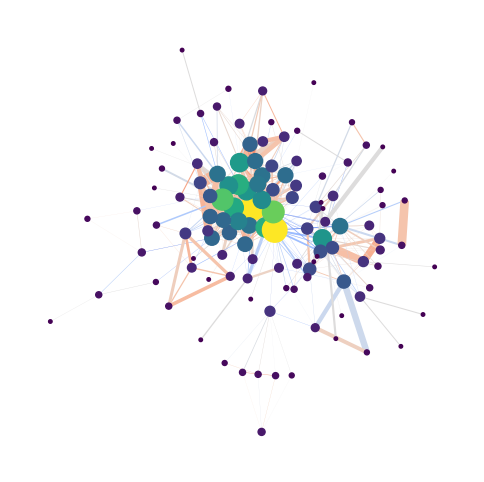

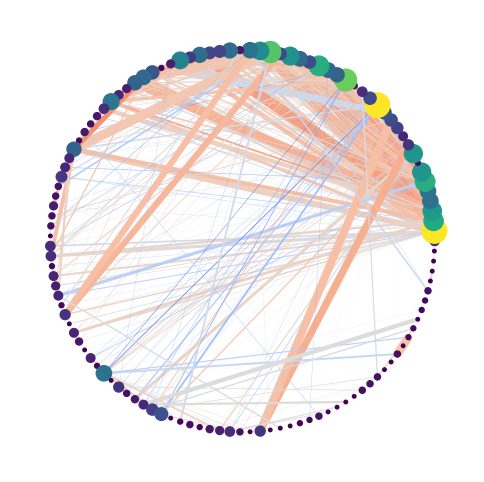

In [26]:
sG = G
sG_centrality = nx.degree_centrality(sG)
sG_cent_sizes = [sG_centrality[node] * 750 for node in sG.nodes()] #Scale Visually
sG_n_color = np.asarray([degrees[n] for n in sG.nodes()])
pos1 = nx.fruchterman_reingold_layout(sG, k=1.2, seed=42)
pos2 = nx.kamada_kawai_layout(sG, scale=1000)
pos3 = nx.circular_layout(sG)
for idx,pos in enumerate([pos1, pos2, pos3]):
    fig, ax = plt.subplots(1,1,figsize=(6, 6))
    nx.draw_networkx_nodes(sG, 
            pos=pos, node_size=sG_cent_sizes,node_color=sG_n_color,
                          )
    sG_weights = [max(G[u][v]['a2b'],G[u][v]['b2a'])/20 for u,v in sG.edges()]
    MMS = MinMaxScaler()
    nx.draw_networkx_edges(sG, pos=pos, width=sG_weights, edge_color=df.query("hsanum == @choc_hsa").OR_0.iloc[0], 
                           edge_cmap=plt.cm.coolwarm, edge_vmax=1.3, edge_vmin=-1.3
                          )
    ax.set_axis_off()
    plt.savefig(f"../figures/santa-ana_layout-{idx}.pdf", bbox_inches="tight", transparent=True)

## Curvature Distributions

In [86]:
region_states = {
    "Region 1 - Boston": ["CT", "ME", "MA", "NH", "RI", "VT"],
    "Region 10 - Seattle": ["AK", "ID", "OR", "WA"],
    "Region 2 - New York": ["NJ", "NY", "PR", "VI"],
    "Region 3 - Philadelphia": ["DE", "DC", "MD", "PA", "VA", "WV"],
    "Region 4 - Atlanta": ["AL", "FL", "GA", "KY", "MS", "NC", "SC", "TN"],
    "Region 5 - Chicago": ["IL", "IN", "MI", "MN", "OH", "WI"],
    "Region 6 - Dallas": ["AR", "LA", "NM", "OK", "TX"],
    "Region 7 - Kansas City": ["IA", "KS", "MO", "NE"],
    "Region 8 - Denver": ["CO", "MT", "ND", "SD", "UT", "WY"],
    "Region 9 - San Francisco": ["AS", "AZ", "CA", "MP", "FM", "GU", "HI", "MH", "NV", "PW"]
}


# Sort states within each region
for region, states in region_states.items():
    region_states[region] = sorted(states)

# Concatenate sorted states into a single list
ordered_states = []
for region in sorted(region_states.keys()):
    ordered_states.extend(region_states[region])

In [87]:
region_order = df["region"].unique()
region_numbers = [int(region.split(' - ')[0].split(' ')[-1]) for region in region_order]
sorted_regions_array = [region for _, region in sorted(zip(region_numbers, region_order))]

In [98]:
trimmed_df = df[["hsanum", "region", "state","OR_0",]]
trimmed_df = trimmed_df.explode('OR_0')
melted_df = pd.melt(trimmed_df, id_vars=['hsanum','state', 'region'],
                    var_name='Curvature Type',value_name="ORC")

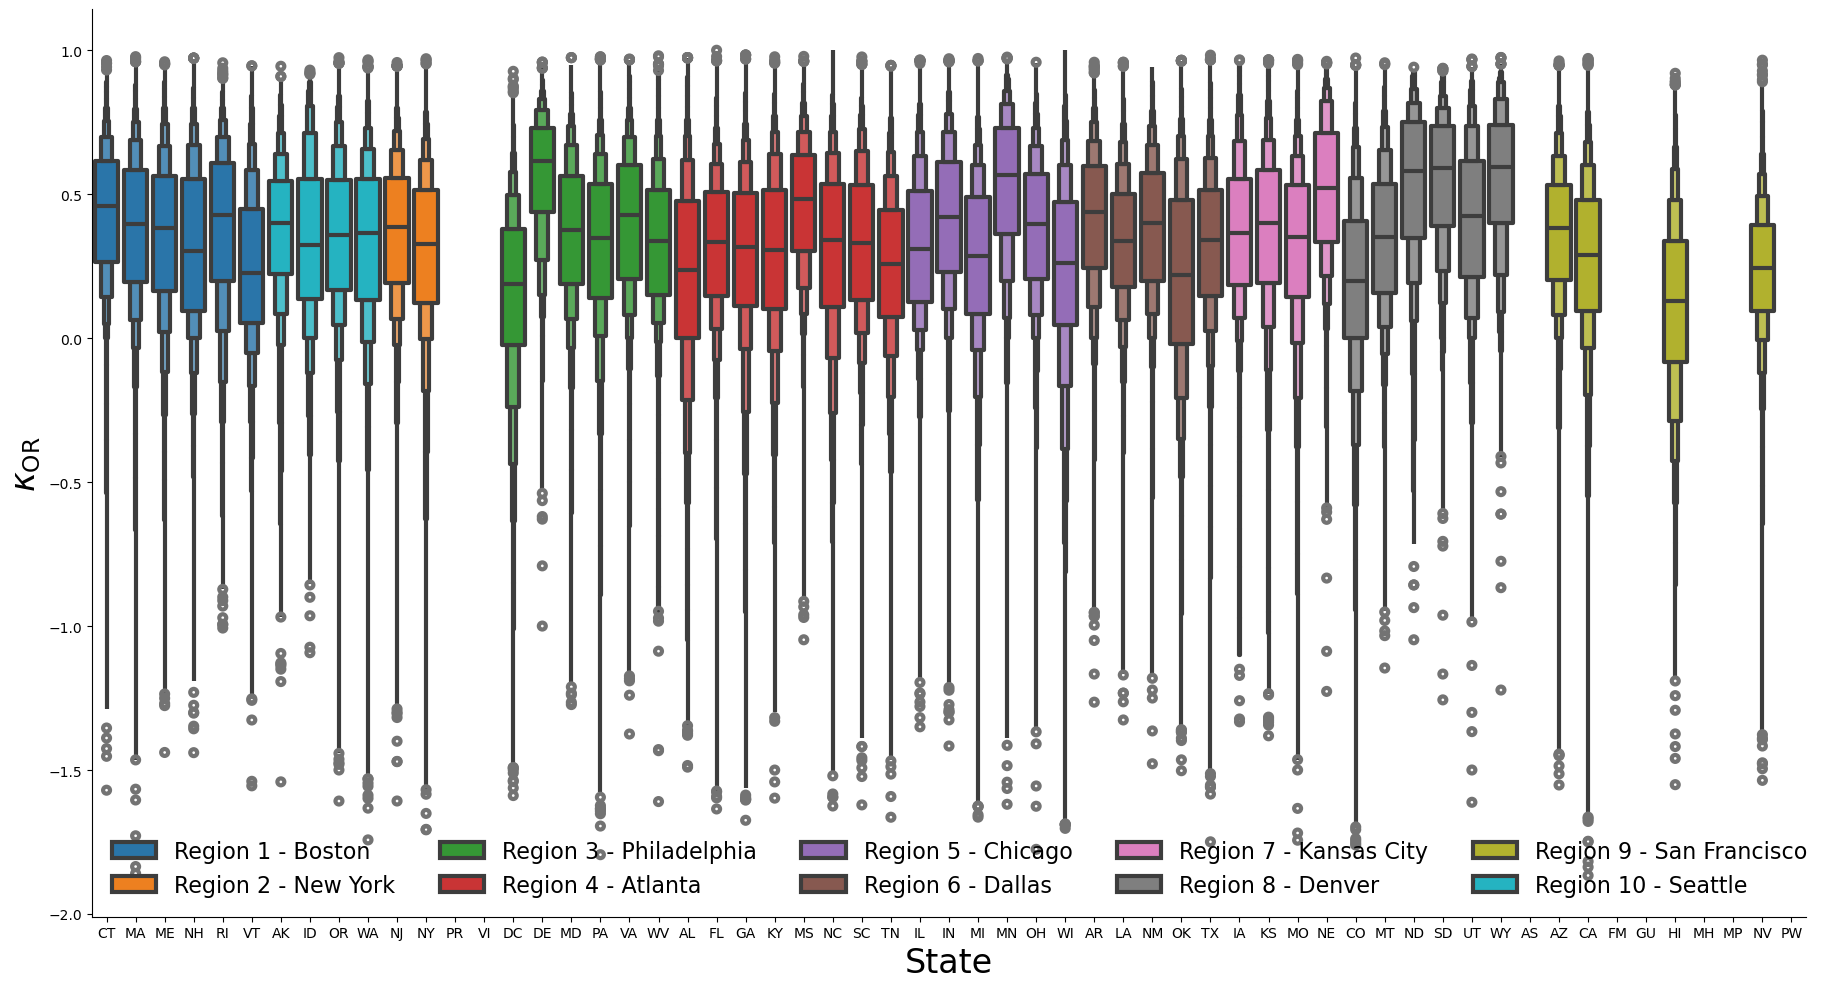

In [104]:
fig, ax = plt.subplots(1,1,figsize=(20, 10))
sns.boxenplot(x='state', y='ORC', hue="region", data=melted_df, palette=[cmap(idx/len(sorted_regions)) for idx in range(len(sorted_regions))],
              hue_order=sorted_regions_array,order=ordered_states,saturation=0.85, ax=ax,legend=True, 
              box_kws=dict(lw=3), flier_kws=dict(lw=3), line_kws=dict(linewidth=3),
             )
ax.legend(loc='lower left', ncols=5, fontsize=ticksize, frameon=False,)
sns.despine(fig)

plt.xlabel('State', fontsize=ticksize*1.5)
plt.ylabel(r'$\kappa_{\text{OR}}$', fontsize=ticksize*1.5)
plt.tight_layout()
plt.savefig(f"/Users/jeremy.wayland/Desktop/writing/iplsd_physician_networks/figures/orc-distribution-by-region.pdf", bbox_inches="tight", transparent=True)

In [105]:
forman_trimmed = df[["hsanum", "region", "state","forman_curvature",]]
forman_trimmed_df = forman_trimmed.explode('forman_curvature')
forman_melted_df = pd.melt(forman_trimmed_df, id_vars=['hsanum','state', 'region'],
                    var_name='Curvature Type',value_name="Forman-Ricci Curvature")


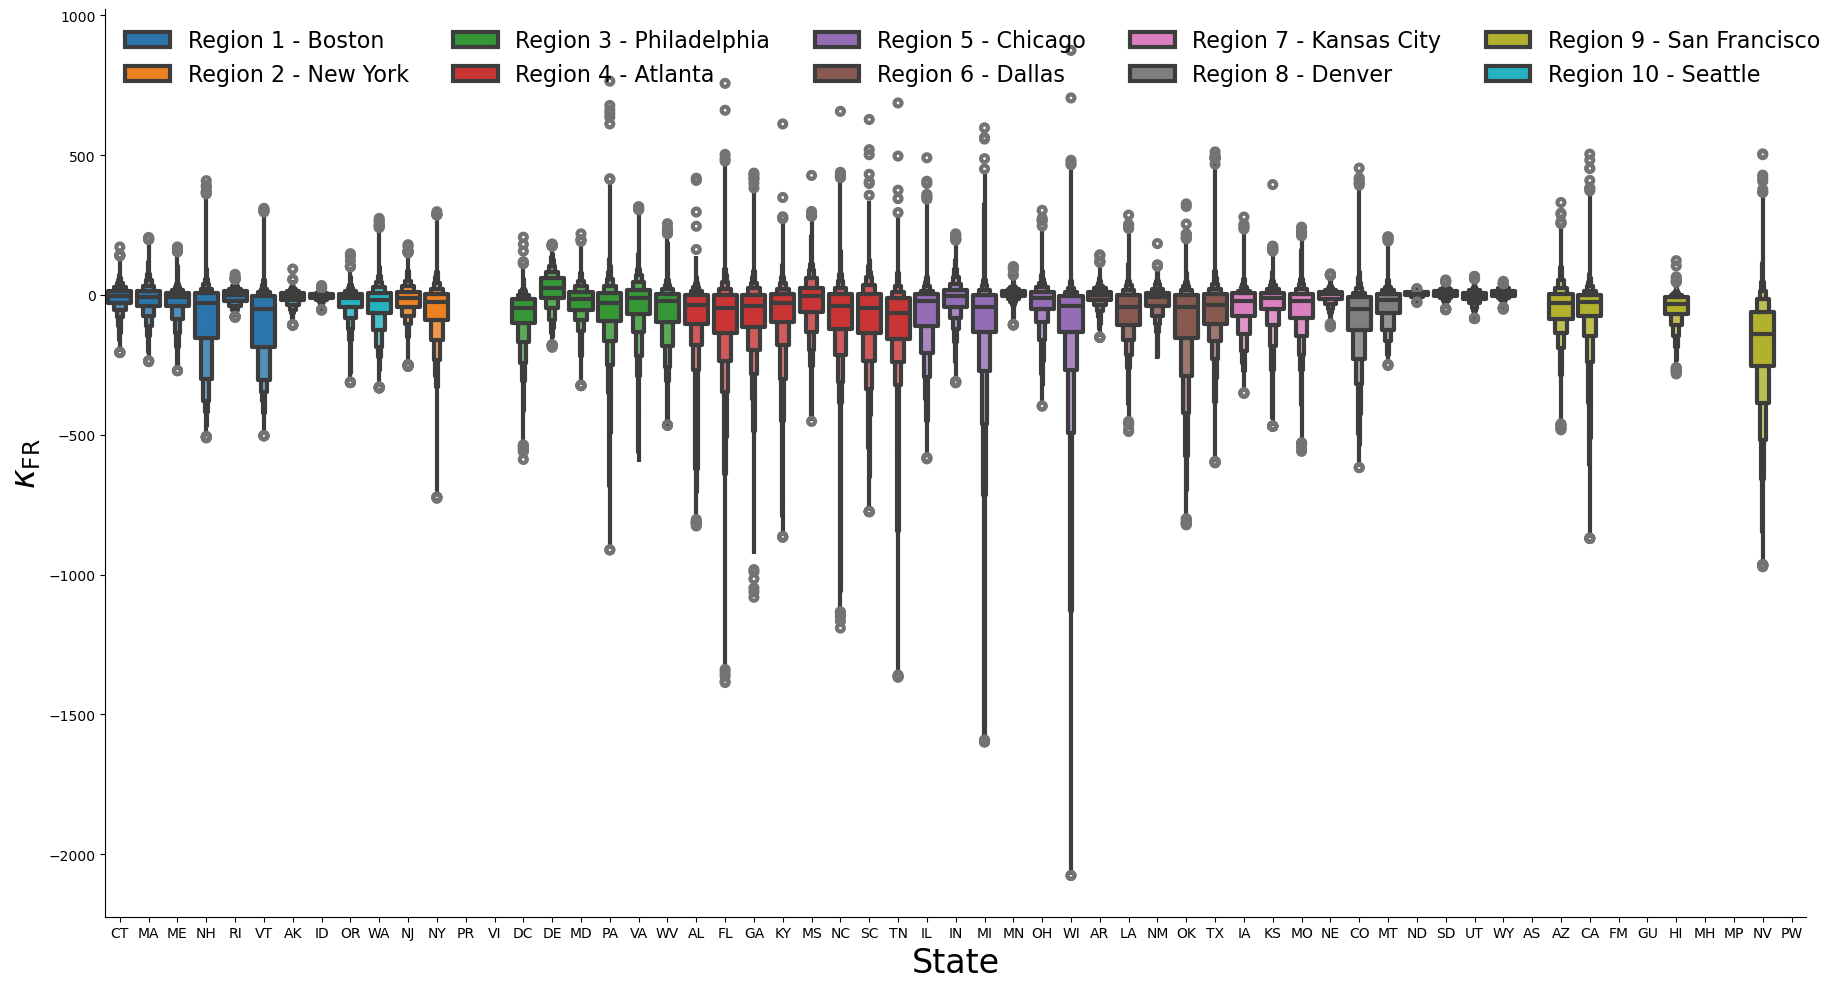

In [106]:
fig, ax = plt.subplots(1,1,figsize=(20, 10))
sns.boxenplot(x='state', y='Forman-Ricci Curvature', hue="region", data=forman_melted_df, palette=[cmap(idx/len(sorted_regions)) for idx in range(len(sorted_regions))],
              hue_order=sorted_regions_array,order=ordered_states,saturation=0.85, ax=ax,legend=True, 
              box_kws=dict(lw=3), flier_kws=dict(lw=3), line_kws=dict(linewidth=3),
             )
ax.legend(loc='upper left', ncols=5, fontsize=ticksize, frameon=False,)
sns.despine(fig)

plt.xlabel('State', fontsize=ticksize*1.5)
plt.ylabel(r'$\kappa_{\text{FR}}$', fontsize=ticksize*1.5)
plt.tight_layout()
plt.savefig(f"/Users/jeremy.wayland/Desktop/writing/iplsd_physician_networks/figures/forman-distribution-by-region.pdf", bbox_inches="tight", transparent=True)

### Basic Descriptive Stats Plots
NB: Number of physicians is imprecise b/c (I assume) we are only counting the physicians that are part of at least one referral network...?
Also, why did ppl threshold the data in the first place? (This introduces unnecessary cutoff effects...)

/var/folders/gb/wn39rs4d4c78qc1gyn183wp80000gs/T/ipykernel_38741/3490584407.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=ticksize)
/var/folders/gb/wn39rs4d4c78qc1gyn183wp80000gs/T/ipykernel_38741/3490584407.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ordered_states, fontsize=ticksize - 4)
/var/folders/gb/wn39rs4d4c78qc1gyn183wp80000gs/T/ipykernel_38741/3490584407.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=ticksize)


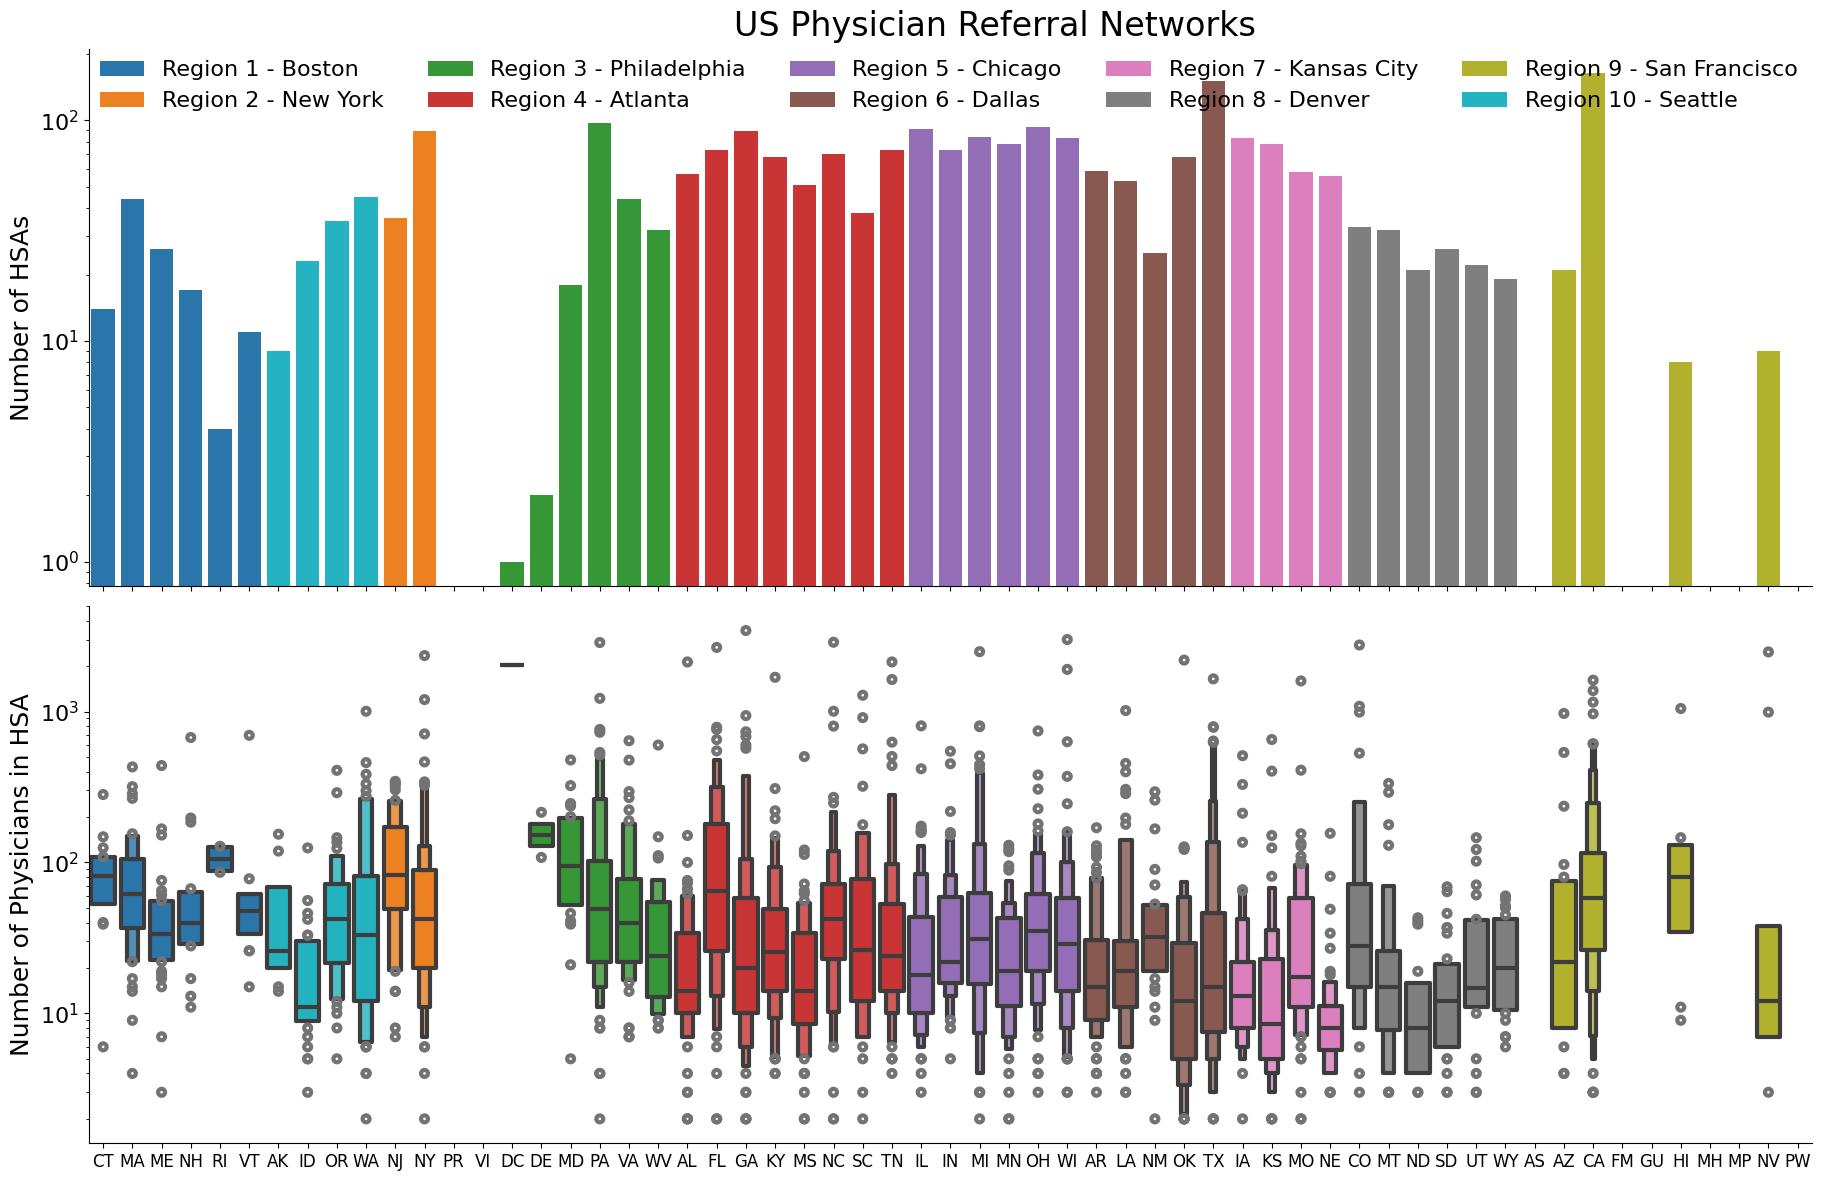

In [22]:
# Set up the figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Plot 1: Countplot
sns.countplot(data=df, x="state", hue="region", hue_order=sorted_regions_array, order=ordered_states, palette="tab10", saturation=0.85, ax=ax1,)
ax1.set_ylabel('Number of HSAs', fontsize=labelsize)
ax1.set_yscale('log')
ax1.legend(loc='upper left', ncols=5, fontsize=ticksize, frameon=False, borderaxespad=0.1)  
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=ticksize)

# Plot 2: Boxenplot
sns.boxenplot(data=df, x="state", y="n_nodes", hue="region", hue_order=sorted_regions_array, order=ordered_states, palette="tab10", saturation=0.85, 
              log_scale=True, ax=ax2, legend=False, 
              box_kws=dict(lw=3), flier_kws=dict(lw=3), line_kws=dict(linewidth=3),
             )
ax2.set_ylabel('Number of Physicians in HSA', fontsize=labelsize)
ax2.set_xlabel("")
ax2.set_xticklabels(ordered_states, fontsize=ticksize - 4)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=ticksize)
#ax2.legend(loc='upper right', ncols=5)
#ax2.get_legend().remove()

sns.despine(fig)

plt.suptitle("US Physician Referral Networks", fontsize=labelsize + 6)
# Adjust layout
plt.tight_layout()
plt.savefig(f"../figures/basic-descriptive-statistics.pdf", bbox_inches="tight", transparent=True)

In [308]:
df.query("region == 'Region 5 - Chicago'")[["hsanum","state", "OR_0"]].explode("OR_0").state.unique()

array(['WI', 'OH', 'MI', 'IL', 'IN', 'MN'], dtype=object)

In [320]:
plt.cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

### ORC Distributions for three selected states
NB: This is a bit misleading because we are not accounting for the intrinsic size of the networks.

/var/folders/81/4smyjgm56s7gm79ptgb726s904l6lt/T/ipykernel_35299/3682126798.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=labelsize*1.4 + 4)
/var/folders/81/4smyjgm56s7gm79ptgb726s904l6lt/T/ipykernel_35299/3682126798.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=labelsize*1.4 + 4)


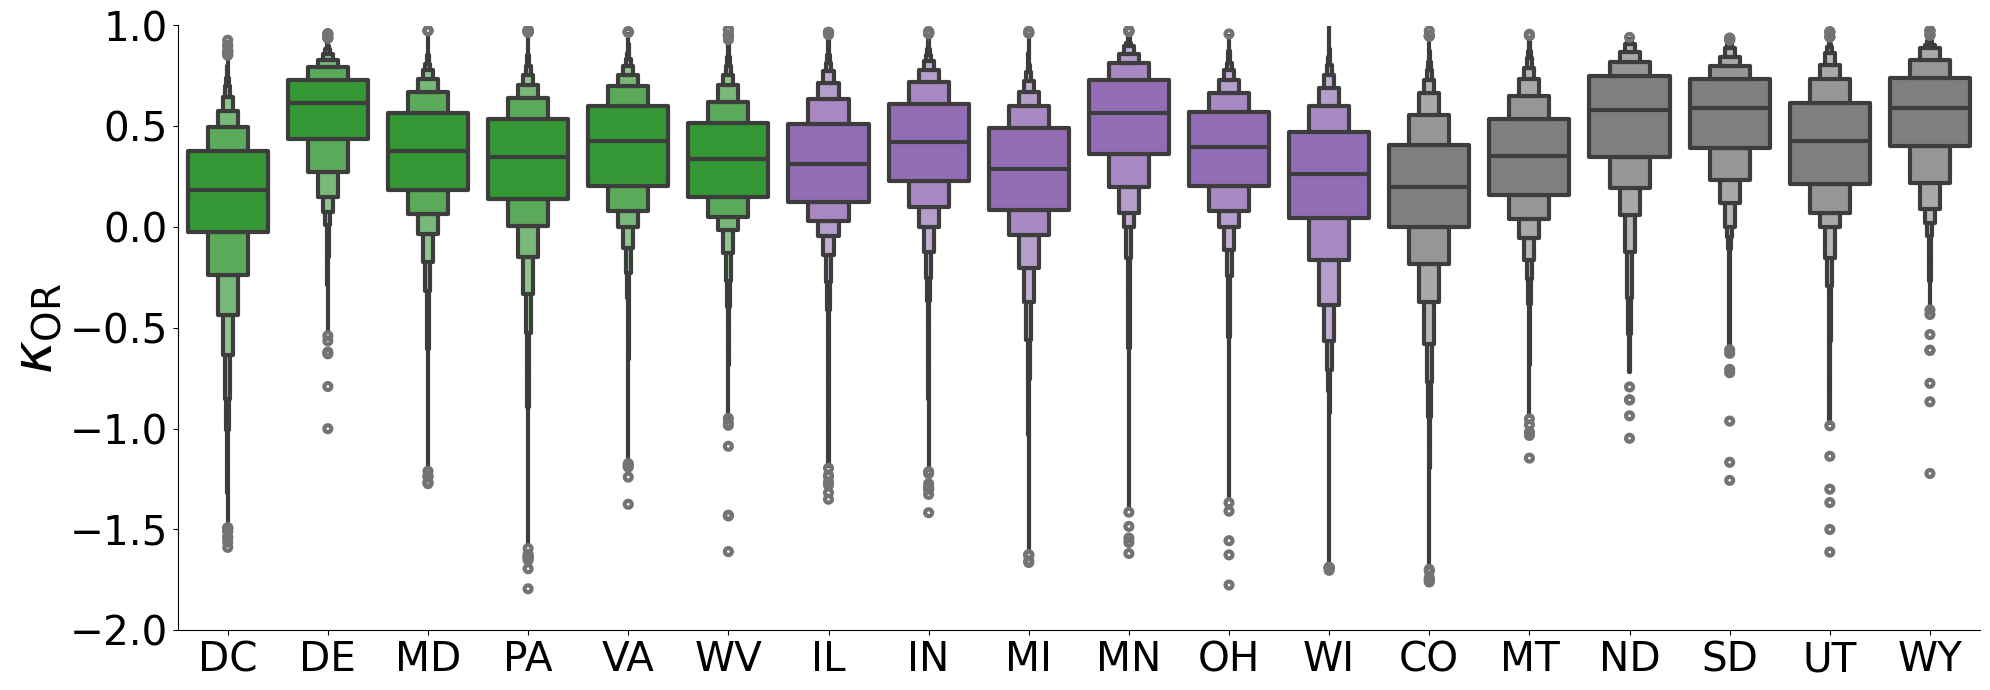

In [113]:
selected_regions = [#'Region 1 - Boston', 
                    'Region 3 - Philadelphia', 'Region 5 - Chicago', 'Region 8 - Denver']
fig, ax = plt.subplots(1,1, figsize=(20,7))
sns.boxenplot(data=df.query("region in @selected_regions")[["hsanum","region","state","OR_0"]].explode("OR_0").sort_values("region"), 
              x="state", y="OR_0", hue="region", order=[x for x in ordered_states if x in df.query("region in @selected_regions").state.unique()], 
              ax=ax, saturation=0.85, palette=[plt.cm.tab10(2), plt.cm.tab10(4), plt.cm.tab10(7)], legend=False,
              box_kws=dict(lw=3), flier_kws=dict(lw=3), line_kws=dict(linewidth=3),
             )
sns.despine(fig)
ax.set_ylabel(r"$\kappa_{\text{OR}}$", fontsize=labelsize*2 + 4)
ax.set_xlabel("")
ax.set_ylim(-2,1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=labelsize*1.4 + 4)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=labelsize*1.4 + 4)
plt.tight_layout()
plt.savefig(f"/Users/jeremy.wayland/Desktop/writing/iplsd_physician_networks/figures/orc-selected-regions.pdf", bbox_inches="tight", transparent=True)

In [114]:
region_order

array(['Region 6 - Dallas', 'Region 7 - Kansas City', 'Region 8 - Denver',
       'Region 4 - Atlanta', 'Region 9 - San Francisco',
       'Region 5 - Chicago', 'Region 2 - New York',
       'Region 3 - Philadelphia', 'Region 10 - Seattle',
       'Region 1 - Boston'], dtype=object)

### Clustering Coefficients
NB: This is a bit misleading because we are not accounting for the intrinsic size of the networks.

/var/folders/81/4smyjgm56s7gm79ptgb726s904l6lt/T/ipykernel_35299/1833855518.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=labelsize*1.4 + 4)
/var/folders/81/4smyjgm56s7gm79ptgb726s904l6lt/T/ipykernel_35299/1833855518.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=labelsize*1.4 + 4)


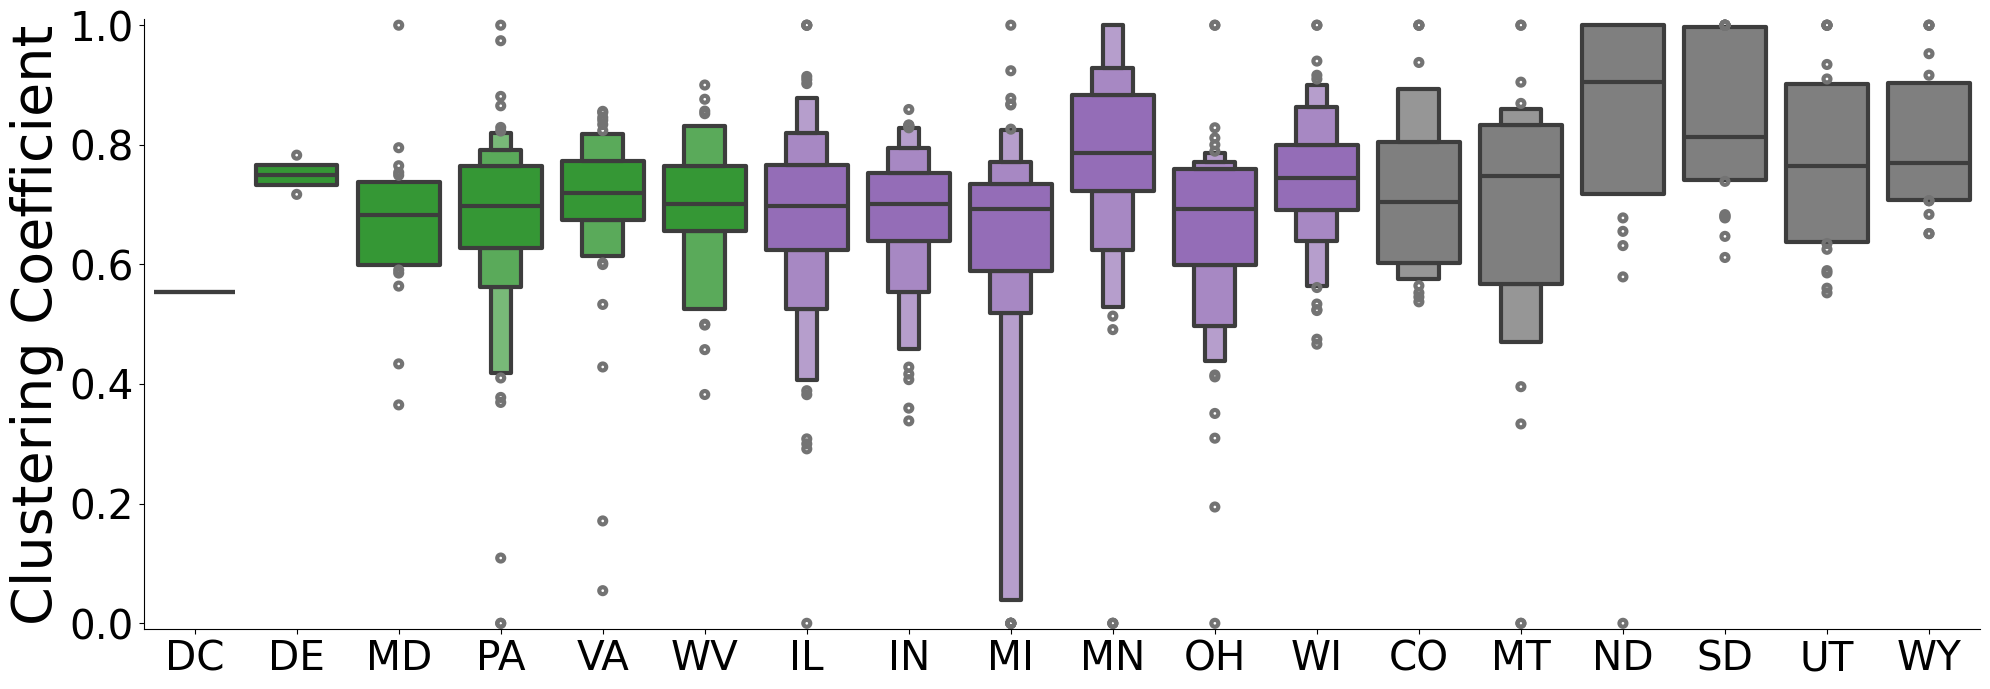

In [115]:
selected_regions = [#'Region 1 - Boston', 
                    'Region 3 - Philadelphia', 'Region 5 - Chicago', 'Region 8 - Denver']
fig, ax = plt.subplots(1,1, figsize=(20,7))
sns.boxenplot(data=df.query("region in @selected_regions")[["hsanum","region","state","clustering_coefficients"]].sort_values("region"), 
              x="state", y="clustering_coefficients", hue="region", order=[x for x in ordered_states if x in df.query("region in @selected_regions").state.unique()], 
              ax=ax, saturation=0.85, palette=[plt.cm.tab10(2), plt.cm.tab10(4), plt.cm.tab10(7)], legend=False, 
              box_kws=dict(lw=3), flier_kws=dict(lw=3), line_kws=dict(linewidth=3),
             )
sns.despine(fig)
ax.set_ylabel("Clustering Coefficient", fontsize=labelsize*2 + 4)
ax.set_xlabel("")
ax.set_ylim(-0.01,1.01)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=labelsize*1.4 + 4)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=labelsize*1.4 + 4)
plt.tight_layout()
plt.savefig(f"/Users/jeremy.wayland/Desktop/writing/iplsd_physician_networks/figures/ccoeff-selected-regions.pdf", bbox_inches="tight", transparent=True)

In [389]:
with open("../data/2017_US_Networks/max_curvature_network.pkl", "rb") as f:
    max_data = pickle.load(f)
with open("../data/2017_US_Networks/min_curvature_network.pkl", "rb") as f:
    min_data = pickle.load(f)
with open("../data/2017_US_Networks/zero_curvature_network.pkl", "rb") as f:
    zero_data = pickle.load(f)

In [390]:
Gmax = max_data["max_curvature"]["Network"]
Gmin = min_data["min_curvature"]["Network"]
Gzero = zero_data["zero_curvature"]["Network"]

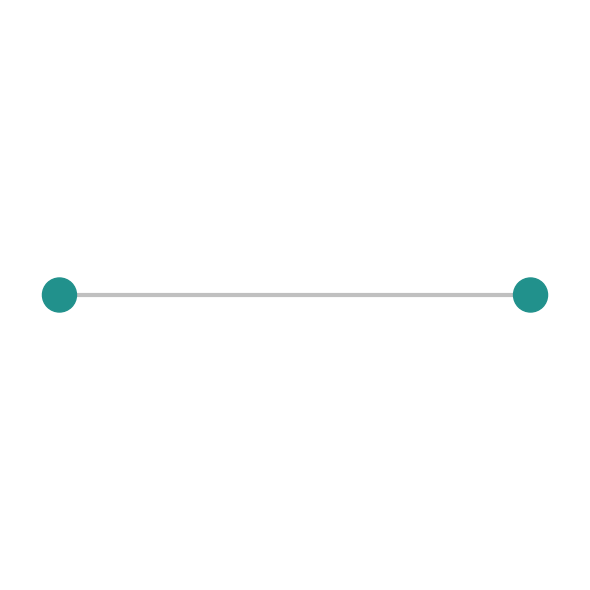

In [422]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
pos ={1285675488:(0,0),1629023486:(1,0)}
nx.draw_networkx_nodes(Gzero, pos=pos, node_size=600, node_color=[plt.cm.viridis(0.5)]*2)
nx.draw_networkx_edges(Gzero, pos=pos, edge_color="silver", width=3)
ax.set_axis_off()
plt.tight_layout()
plt.savefig(f"../figures/zero-curvature-example.pdf", bbox_inches="tight", transparent=True)

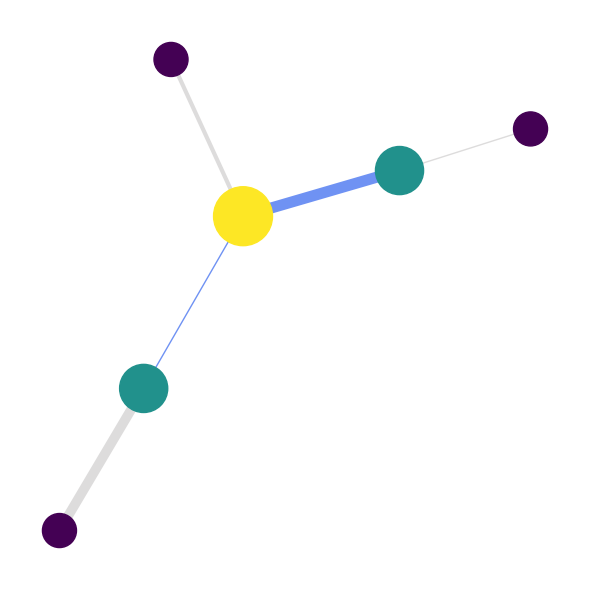

In [448]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
pos = nx.fruchterman_reingold_layout(Gmin, seed=42)
nx.draw_networkx_nodes(Gmin, pos=pos, node_color=[x[-1] for x in list(Gmin.degree())], node_size=[x[-1]*600 for x in list(Gmin.degree())], )
nx.draw_networkx_edges(Gmin, pos=pos, width=[max(x[-1].values())//4 for x in Gmin.edges(data=True)], edge_cmap=plt.cm.coolwarm, 
                       edge_color=min_data["min_curvature"]["OR_0"], edge_vmin=-0.5, edge_vmax=0.5)
ax.set_axis_off()
plt.tight_layout()
plt.savefig(f"../figures/min-curvature-example.pdf", bbox_inches="tight", transparent=True)

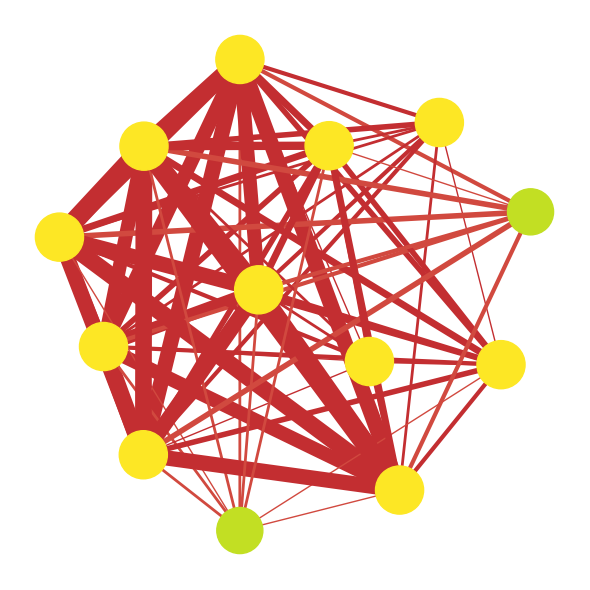

In [459]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
pos = nx.fruchterman_reingold_layout(Gmax, seed=42)
nx.draw_networkx_nodes(Gmax, pos=pos, node_color=[x[-1] for x in list(Gmax.degree())], node_size=[x[-1]*100 for x in list(Gmax.degree())], vmin=1, vmax=12)
nx.draw_networkx_edges(Gmax, pos=pos, width=[max(x[-1].values())//10 for x in Gmax.edges(data=True)], edge_cmap=plt.cm.coolwarm, 
                       edge_color=max_data["max_curvature"]["OR_0"], edge_vmin=-1, edge_vmax=1)
ax.set_axis_off()
plt.tight_layout()
plt.savefig(f"../figures/max-curvature-example.pdf", bbox_inches="tight", transparent=True)

In [3]:
interactions = pd.read_csv('/Users/jeremy.wayland/Desktop/dev/apparent/outputs/databases/network_panel_undirected_local_hsa_edges.csv')

In [6]:
interactions.head()

,year,hsanum,npi_a,npi_b,a2b,b2a
0,2014,1001,1750540035,1982684999,0,2
1,2014,1001,1245433648,1982684999,7,3
2,2014,1001,1841384724,1982684999,12,5
3,2014,1001,1003029869,1982684999,2,4
4,2014,1001,1902845829,1982684999,6,2


In [5]:
len(interactions['year'].unique())

4

In [10]:
len(set(interactions['npi_a'].unique()).union(set(interactions['npi_b'].unique())))

663541

In [11]:
len(interactions)

39140700

In [15]:
year_totals = [sum(interactions['year'] == x) for x in interactions['year'].unique()]

In [16]:
year_totals

[9553413, 9545370, 9854520, 10187397]

In [17]:
len(interactions['hsanum'].unique())

3404

In [117]:
all_features = pd.read_csv('/Users/jeremy.wayland/Desktop/dev/apparent/outputs/IPLDS_all_network_features_with_meta.csv')

In [118]:
all_features.head()

,hsa,year,assortativity,average_clustering,density,nnodes,nedges,forman_mean,forman_stdev,forman_median,...,ptl_pt_asr_sur_readmit,race_total_pop,race_black_pop,hispanic_total_pop,hispanic_pop,median_hh_income,employment_pop,employment_unemployed_pop,education_pop,education_nohs_pop
0,1001,2014,-0.429306,0.757948,0.308016,98,1464,-2.997268,29.105001,-2.0,...,0.746,8870,3798,8870,3585,707713.0,55371,4504,75280,12481
1,1002,2014,-0.276127,0.853843,0.620120,37,413,13.883777,12.185454,16.0,...,NaN,806,571,806,130,33497.0,8786,926,14443,3529
2,1003,2014,-0.350290,0.708825,0.476667,25,143,3.727273,7.111678,4.0,...,0.026,2129,828,2129,320,269485.0,11093,1103,17478,3138
3,1004,2014,-0.410506,0.802295,0.356764,117,2421,4.125568,36.906872,10.0,...,0.546,7236,3430,7236,2019,538347.0,46212,6074,69954,13880
4,1006,2014,-0.458333,0.595833,0.500000,8,14,2.214286,2.540488,3.0,...,NaN,1217,397,1217,241,103134.0,5044,576,8356,1995


In [125]:
all_features[all_features['year']==2017]

,hsa,year,assortativity,average_clustering,density,nnodes,nedges,forman_mean,forman_stdev,forman_median,...,ptl_pt_asr_sur_readmit,race_total_pop,race_black_pop,hispanic_total_pop,hispanic_pop,median_hh_income,employment_pop,employment_unemployed_pop,education_pop,education_nohs_pop
10120,1001,2017,-0.389357,0.756683,0.242869,110,1456,-11.618819,27.342072,-10.0,...,0.923,113846,15725,113846,8875,665537.0,53481,2985,75356,11063
10121,1002,2017,-0.274159,0.826088,0.654878,41,537,13.297952,12.783713,15.0,...,NaN,22751,7725,22751,821,64984.0,9258,971,15983,3763
10122,1003,2017,-0.316501,0.687892,0.395699,31,184,4.532609,9.329070,8.5,...,0.851,25672,3500,25672,439,242027.0,11588,1229,17934,2899
10123,1004,2017,-0.416998,0.804651,0.342429,116,2284,0.213660,36.686654,8.0,...,0.962,100479,21195,100479,4013,563869.0,45552,4680,69899,12723
10124,1006,2017,-0.321429,0.658333,0.355556,10,16,0.562500,2.783181,1.0,...,NaN,11491,1671,11491,419,109751.0,5077,374,7985,2086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13488,53021,2017,-0.232525,0.840009,0.606531,50,743,21.923284,15.779803,25.0,...,0.039,29043,299,29043,1259,400825.0,14658,470,20385,968
13489,53023,2017,-0.283019,0.952381,0.944444,9,34,7.558824,1.479093,7.0,...,NaN,4702,0,4702,92,94219.0,2357,97,3574,270
13490,53024,2017,NaN,1.000000,1.000000,7,21,7.000000,0.000000,7.0,...,NaN,12861,9,12861,1358,213259.0,6265,409,9083,800
13491,53025,2017,NaN,1.000000,1.000000,10,45,10.000000,0.000000,10.0,...,NaN,8847,3,8847,678,189767.0,4485,110,6399,479


In [124]:
for col in all_features.columns:
    print(col)

hsa
year
assortativity
average_clustering
density
nnodes
nedges
forman_mean
forman_stdev
forman_median
forman_mode
forman_quantile_25
forman_quantile_50
forman_quantile_75
centrality_mean
centrality_stdev
centrality_median
centrality_mode
centrality_quantile_25
centrality_quantile_50
centrality_quantile_75
ar_pmt_dme
ar_pmt_hha
ar_pmt_hospice
ar_pmt_hospitalsnf
ar_pmt_outpt
ar_pmt_physician
ar_pmt_total
ar_stdprice_dme
ar_stdprice_hha
ar_stdprice_hospice
ar_stdprice_hospitalsnf
ar_stdprice_outpt
ar_stdprice_physician
ar_stdprice_total
oe_pmt_dme
oe_pmt_hha
oe_pmt_hospice
oe_pmt_hospitalsnf
oe_pmt_outpt
oe_pmt_physician
oe_pmt_total
oe_stdprice_dme
oe_stdprice_hha
oe_stdprice_hospice
oe_stdprice_hospitalsnf
oe_stdprice_outpt
oe_stdprice_physician
oe_stdprice_total
ptl_pmt_dme
ptl_pmt_hha
ptl_pmt_hospice
ptl_pmt_hospitalsnf
ptl_pmt_outpt
ptl_pmt_physician
ptl_pmt_total
ptl_stdprice_dme
ptl_stdprice_hha
ptl_stdprice_hospice
ptl_stdprice_hospitalsnf
ptl_stdprice_outpt
ptl_stdprice_physicia

In [66]:
# Comparative Network:
hsa = 11104

In [67]:
import sys
sys.path.append("..")
from apparent.curvature import ollivier_ricci_curvature
import os
graphs_dir = "/Users/jeremy.wayland/Desktop/dev/apparent/outputs/graphs/"

In [68]:
for f in os.listdir(graphs_dir):
    with open(os.path.join(graphs_dir, f), "rb") as f:
        entry = pickle.load(f)
        if entry["hsanum"] == hsa:
            G = entry["graph"]
            break

In [69]:
len(G.nodes())

128

In [70]:
pos = nx.circular_layout(G)

orc = ollivier_ricci_curvature(G)
degrees = G.degree() #Dict with Node ID, Degree
centrality = nx.degree_centrality(G)
cent_sizes = [centrality[node] * 500 for node in G.nodes()] #Scale Visually



nodes = G.nodes()
n_color = np.asarray([degrees[n] for n in nodes])


# Max
weights = [max(G[u][v]['a2b'],G[u][v]['b2a'])/20 for u,v in G.edges()]

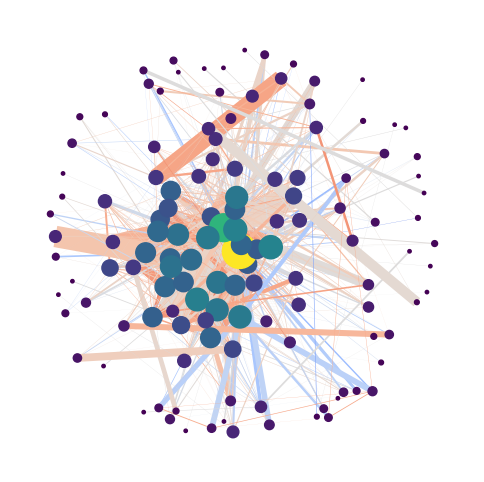

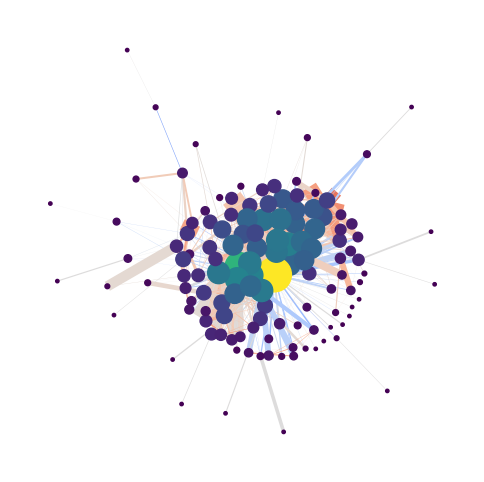

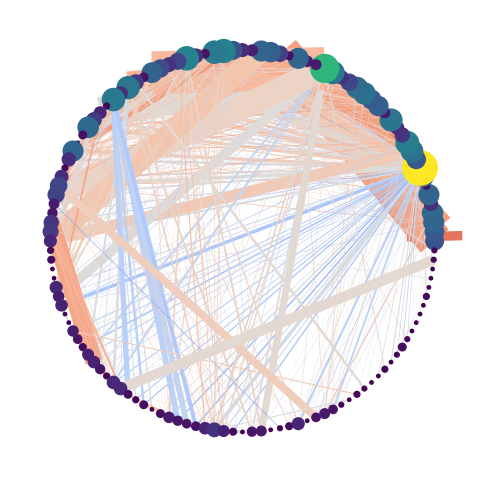

In [71]:
sG = G
sG_centrality = nx.degree_centrality(sG)
sG_cent_sizes = [sG_centrality[node] * 750 for node in sG.nodes()] #Scale Visually
sG_n_color = np.asarray([degrees[n] for n in sG.nodes()])
pos1 = nx.fruchterman_reingold_layout(sG, k=1.2, seed=42)
pos2 = nx.kamada_kawai_layout(sG, scale=1000)
pos3 = nx.circular_layout(sG)
for idx,pos in enumerate([pos1, pos2, pos3]):
    fig, ax = plt.subplots(1,1,figsize=(6, 6))
    nx.draw_networkx_nodes(sG, 
            pos=pos, node_size=sG_cent_sizes,node_color=sG_n_color,
                          )
    sG_weights = [max(G[u][v]['a2b'],G[u][v]['b2a'])/20 for u,v in sG.edges()]
    MMS = MinMaxScaler()
    nx.draw_networkx_edges(sG, pos=pos, width=sG_weights, edge_color=orc, 
                           edge_cmap=plt.cm.coolwarm, edge_vmax=1.3, edge_vmin=-1.3
                          )
    ax.set_axis_off()
    plt.savefig(f"/Users/jeremy.wayland/Desktop/writing/iplsd_physician_networks/figures/atlanta_layout-{idx}.pdf", bbox_inches="tight", transparent=True)

In [48]:
len(G.nodes())

498